# model comparison

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# BIC
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

/var/folders/m0/1m7yg24j47s029hc4wgp1v3m0000gn/T/ipykernel_14665/4111250344.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 1].boxplot([delta_bic_see_colors_see_numbers,


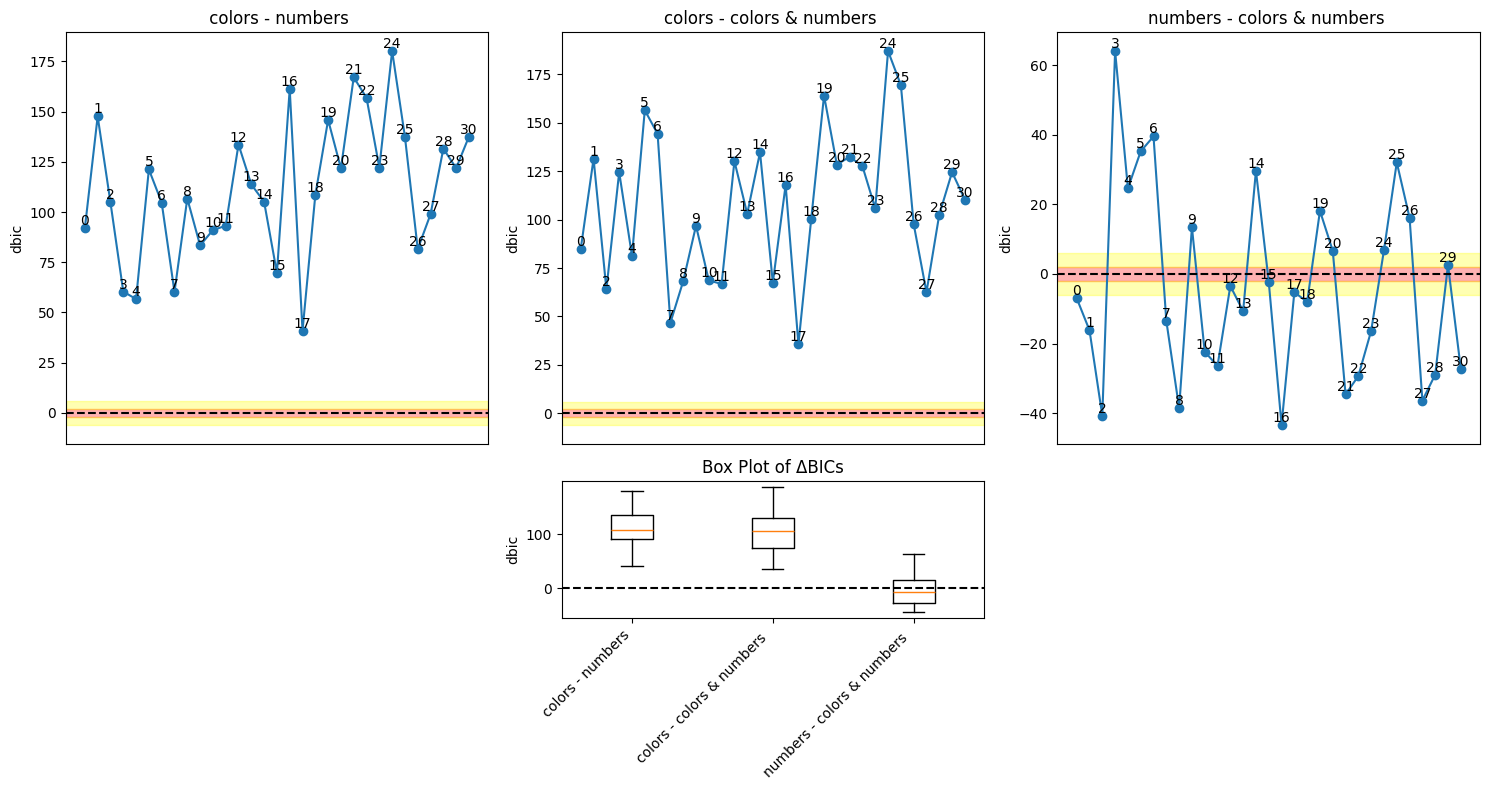

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def read_bic(file_path):
    with open(file_path, 'r') as f:
        return np.array([float(line.strip()) for line in f])

file1 = "BIC/BIC_models_see_numbers.txt"
file2 = "BIC/BIC_models_see_colors.txt"
file3 = "BIC/BIC_models_see_colors_and_numbers.txt"

bic_see_numbers = read_bic(file1)
bic_see_colors = read_bic(file2)
bic_sees_colors_and_numbers = read_bic(file3)

delta_bic_see_colors_see_numbers = bic_see_colors - bic_see_numbers
delta_bic_see_colors_and_numbers_see_colors = bic_see_colors - bic_sees_colors_and_numbers
delta_bic_see_colors_and_numbers_see_numbers = bic_see_numbers - bic_sees_colors_and_numbers

participants = range(len(bic_see_numbers))

fig, axs = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'height_ratios': [3, 1]})

# Plot line plots in the top row
for ax, delta_bic, title in zip(axs[0], 
                                [delta_bic_see_colors_see_numbers, delta_bic_see_colors_and_numbers_see_colors, delta_bic_see_colors_and_numbers_see_numbers], 
                                [' colors - numbers', 'colors - colors & numbers ', 'numbers - colors & numbers ']):
    ax.plot(participants, delta_bic, marker='o', linestyle='-')
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_ylabel('dbic')
    ax.set_title(title)
    ax.set_xticks([])  # Remove x-axis labels

    # Add horizontal transparent yellow strip between y = -2 and y = 2
    ax.axhspan(-2, 2, color='red', alpha=0.3)
    ax.axhspan(2, 6, color='yellow', alpha=0.3)
    ax.axhspan(-2, -6, color='yellow', alpha=0.3)

    # Add participant numbers above each node
    for i, txt in enumerate(participants):
        ax.text(i, delta_bic[i], f"{txt}", ha='center', va='bottom', fontsize=10, color='black')

# Create box plot in the bottom row, centered in the middle
axs[1, 1].boxplot([delta_bic_see_colors_see_numbers, 
                   delta_bic_see_colors_and_numbers_see_colors, 
                   delta_bic_see_colors_and_numbers_see_numbers], 
                  labels=[' colors - numbers', 'colors - colors & numbers ', 'numbers - colors & numbers '])

axs[1, 1].set_ylabel('dbic')
axs[1, 1].set_title('Box Plot of ΔBICs')

# Rotate x-axis labels of the box plot
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45, ha="right")

# Add horizontal dashed line at y=0 for the box plot
axs[1, 1].axhline(y=0, color='black', linestyle='--')

# Remove empty subplots
axs[1, 0].axis('off')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
